#### Author: JoelyBem
#### Created on: 13 November 2020 21:29
#### Last Update: 14 November 2020 09:09

### Gradient descent for distance minimisation:
- Initialize random 6 locations for 6 ambulances
- For each crash:
    - Caclulate the distance between crash and all ambulance
    - Taking the minimum distance
- Loss is equal to the mean of distance of all crash and ambulance
- We consider only one model for all crash 
- Consider only longitude and latitude [Not considering hour and days]
- ==> We have only one locations for all hours for all day

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.cluster import KMeans
import random
import datetime
import seaborn as sns

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Load the data
df = pd.read_csv('../Data/Train_mod.csv',parse_dates=['datetime'])
print(df.shape)
df.head()

(6318, 9)


,uid,datetime,latitude,longitude,date,time,day_of_week,month,year
0,1,2018-01-01 00:25:46,-1.188850,36.931382,2018-01-01,00:25:46,Monday,January,2018
1,2,2018-01-01 02:02:39,-0.662939,37.208730,2018-01-01,02:02:39,Monday,January,2018
2,3,2018-01-01 02:31:49,-0.662939,37.208730,2018-01-01,02:31:49,Monday,January,2018
3,4,2018-01-01 03:04:01,-1.288087,36.826583,2018-01-01,03:04:01,Monday,January,2018
4,5,2018-01-01 03:58:49,-1.188850,36.931382,2018-01-01,03:58:49,Monday,January,2018


In [3]:
amb_loc = tf.Variable(tf.random.normal([6, 2], mean=0, stddev=1)) * 0.04
amb_loc = amb_loc + [-1.27, 36.85]
initial_loc = tf.identity(amb_loc)
initial_loc

<tf.Tensor 'Identity:0' shape=(6, 2) dtype=float32>

In [27]:
X = tf.placeholder(tf.float32, [None, 1, 2])
dist_split = X - amb_loc
dist = tf.sqrt(tf.reduce_sum(tf.square(dist_split), axis=2))
min_distance = tf.reduce_min(dist, axis=1)
cost = tf.reduce_mean(min_distance)
learning_rate = tf.placeholder(tf.float32, [])
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [42]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_history = []
training_epochs = 1000
mini_batch_size = 50
learning_r = 0.001

for epoch in range(training_epochs + 1):
    for i in range(0, df.shape[0], mini_batch_size):
        data_used = df[['latitude', 'longitude']].loc[i:i + mini_batch_size]
        X_train_batch = data_used.values.reshape([-1, 1, 2])
        sess.run(optimizer, feed_dict = {X: X_train_batch, learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict = {X: X_train_batch})
        cost_history.append(cost_)
    if epoch % 100 == 0:
        print('Epoch ', epoch, ' cost = ', cost_)


Epoch  0  cost =  0.060410168
Epoch  100  cost =  0.04600035
Epoch  200  cost =  0.04599604
Epoch  300  cost =  0.04599604


KeyboardInterrupt: 

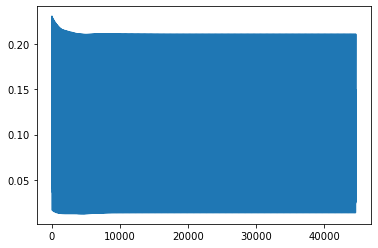

In [45]:
plt.plot(cost_history)

0.038024053
